# Explanation
On this project, I will try to recognize apples. I am using the work entitled 'Fruit recognition from images using deep
learning', a peper zritten by :
Horea Muresan
Faculty of Mathematics and Computer
Science
Mihail Kogˇalniceanu, 1
Babes¸-Bolyai University
qnd
Mihai Oltean
Faculty of Exact Sciences and
Engineering
Unirii, 15-17
”1 Decembrie 1918” University of Alba
Iulia
Romania

I will use their dataset which can be found : https://www.kaggle.com/datasets/moltean/fruits

## First, extract different datasets. Apples are divided in few dataset. I extract all datasets paths from the training folder

In [21]:
# Datasets links
training_data_set = 'C:\\Users\\barbil1\Documents\\archive\\fruits-360_dataset\\fruits-360\\Training'
test_data_set = 'C:\\Users\\barbil1\Documents\\archive\\fruits-360_dataset\\fruits-360\\Test'
import os
apples_folders_paths = [ f.path for f in os.scandir(training_data_set) if f.is_dir() and f.name.startswith("Apple") ]

For the first experience I am going to use TensorFlow such as used im the paper. I found a good tutorial here: https://www.tensorflow.org/tutorials/images/classification

## Using TensorFlow
### Import libraries

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Importing dataset

I define the size at 100pixel like defined in the paper

In [23]:
batch_size = 50
img_height = 100
img_width = 100


train_dataset :tf.data.Dataset = tf.keras.utils.image_dataset_from_directory(training_data_set,  image_size=(img_height, img_width),batch_size=batch_size)
validation_dataset : tf.data.Dataset = tf.keras.utils.image_dataset_from_directory(test_data_set , image_size=(img_height, img_width),batch_size=batch_size)

class_names = train_dataset.class_names
print(class_names)


Found 67692 files belonging to 131 classes.
Found 22688 files belonging to 131 classes.
['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meye

Plot the images

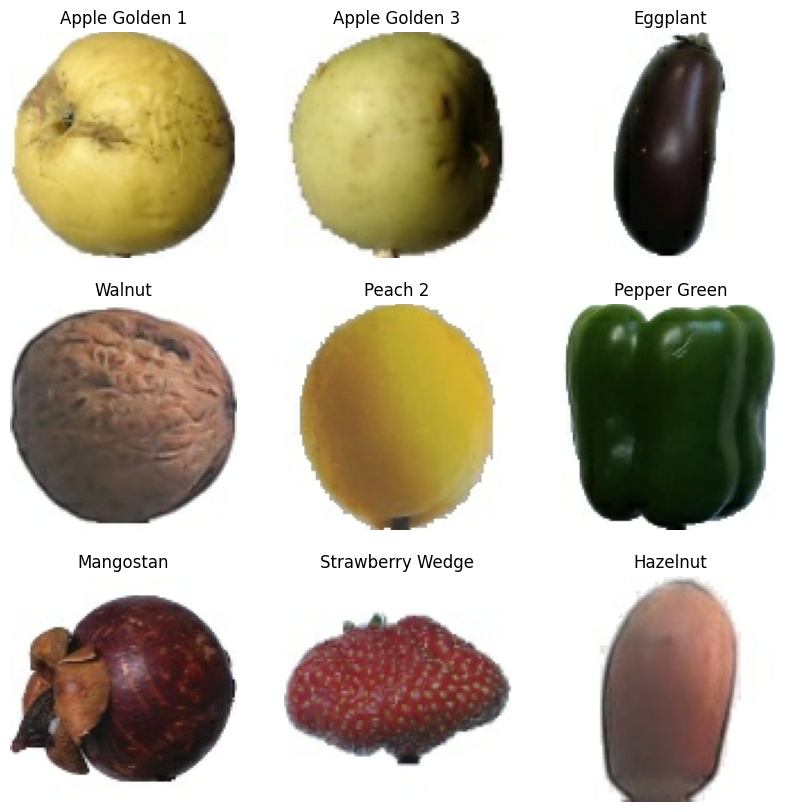

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


Dataset performance


In [26]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)


In [27]:
normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.0 1.0


# Model creation

In [28]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 50, 50, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 25, 25, 64)       

# Train the model

In [19]:
epochs=15
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)


Epoch 1/15
 739/2116 [=========>....................] - ETA: 15:04 - loss: 0.0354 - accuracy: 0.9893

KeyboardInterrupt: 

# Training result

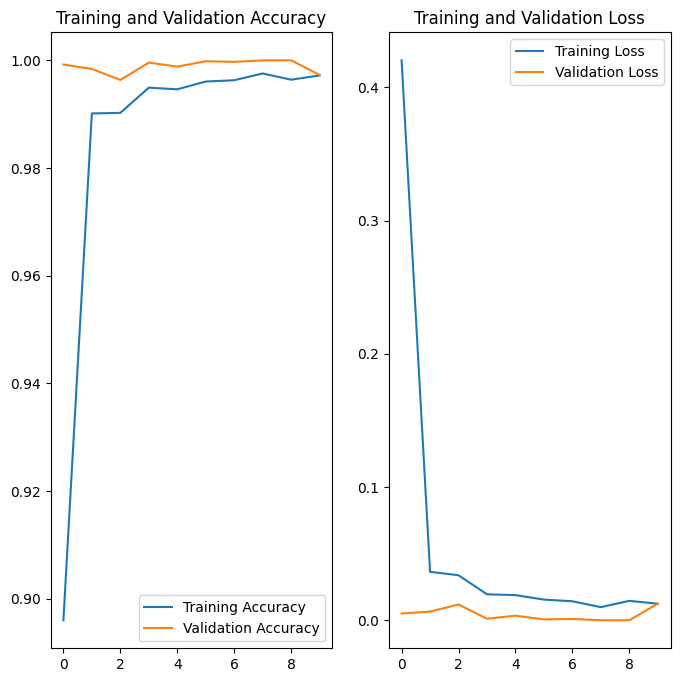

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Trying to recognize an apple

1/1 [==============================] - 0s 42ms/step
This image most likely belongs to Corn Husk with a 99.71 percent confidence.


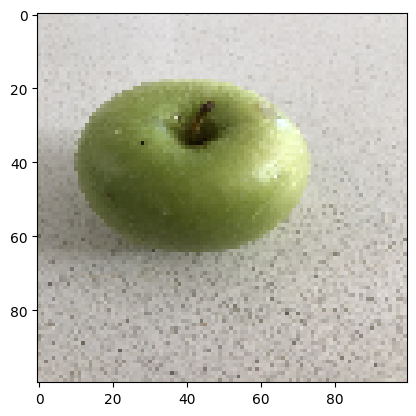

In [54]:
apple_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0e/One_Green_Apple.jpg/1024px-One_Green_Apple.jpg"
apple_path = tf.keras.utils.get_file('green-apple-3', origin=apple_url)

img = tf.keras.utils.load_img(
    apple_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

plt.imshow(img_array[0].numpy().astype("uint8"))

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


# Trying to improve model

In [29]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)


In [ ]:
num_classes = len(class_names)
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

epochs = 10
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 100, 100, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 50, 50, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                 

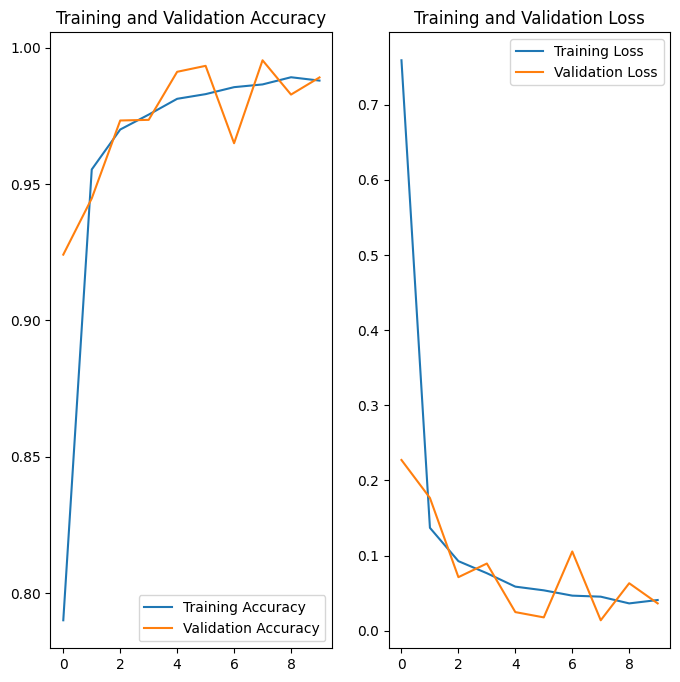

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


1/1 [==============================] - 0s 199ms/step
This image most likely belongs to Corn Husk with a 99.75 percent confidence.


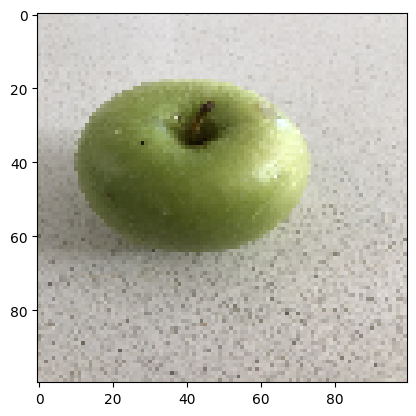

In [18]:
apple_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0e/One_Green_Apple.jpg/1024px-One_Green_Apple.jpg"
apple_path = tf.keras.utils.get_file('green-apple-3', origin=apple_url)

img = tf.keras.utils.load_img(
    apple_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

plt.imshow(img_array[0].numpy().astype("uint8"))

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
